In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

In [3]:
data = pd.read_csv('adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                                        'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                                        'class'])

In [4]:
data = data.replace(' ?', np.nan)
data = data.dropna()
data = data.drop_duplicates()
data = data.drop('fnlwgt', axis = 1)

In [5]:
above_50K = data[data['class'] == ' >50K']
below_50K = data[data['class'] == ' <=50K']

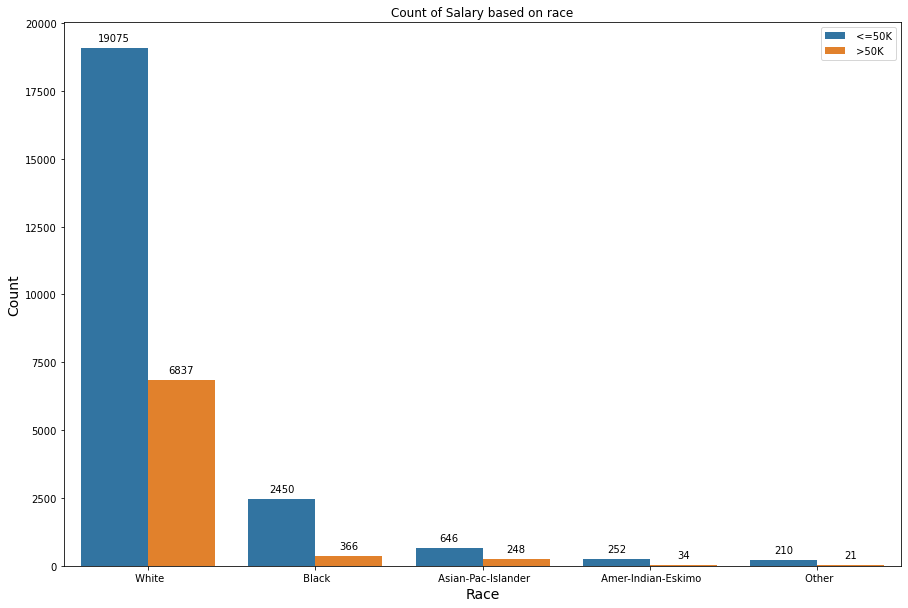

In [6]:
#Scenario 1: Distribution of salary based on race
plt.figure(figsize=(15, 10))
ax = sns.countplot(x=data['race'], hue=data['class'].tolist(), palette=sns.color_palette("tab10"))
ax.set_title('Count of Salary based on race')
ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<ipython-input-7-f0fb1e95f7ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[['hours-per-week','education-num','age']] = scaler.fit_transform(data_subset[['hours-per-week',
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


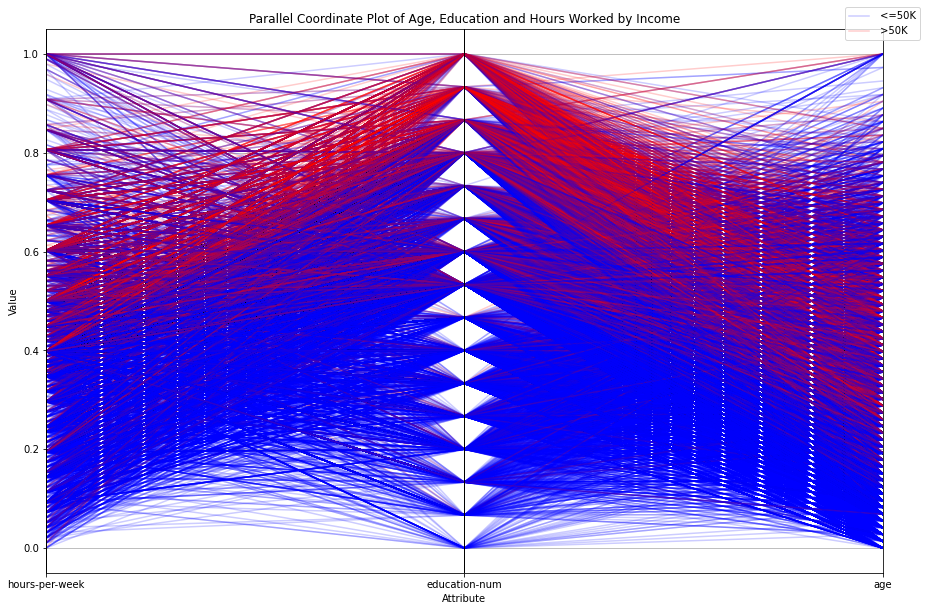

In [7]:
#Scenario 2: Distribution of hours worked, education, age based on income
fig, ax = plt.subplots(figsize=(15, 10))
data_subset = data[['hours-per-week', 'education-num', 'age', 'class']]
scaler = MinMaxScaler()
data_subset[['hours-per-week','education-num','age']] = scaler.fit_transform(data_subset[['hours-per-week', 
                                                                                          'education-num', 'age']])
parallel_coordinates(data_subset, 'class', color=['blue','red'], ax=ax, alpha=0.2)
ax.set_xlabel('Attribute')
ax.set_ylabel('Value')
ax.set_title('Parallel Coordinate Plot of Age, Education and Hours Worked by Income')
ax.legend(bbox_to_anchor=(1.05,1.05),loc="upper right")
plt.show()

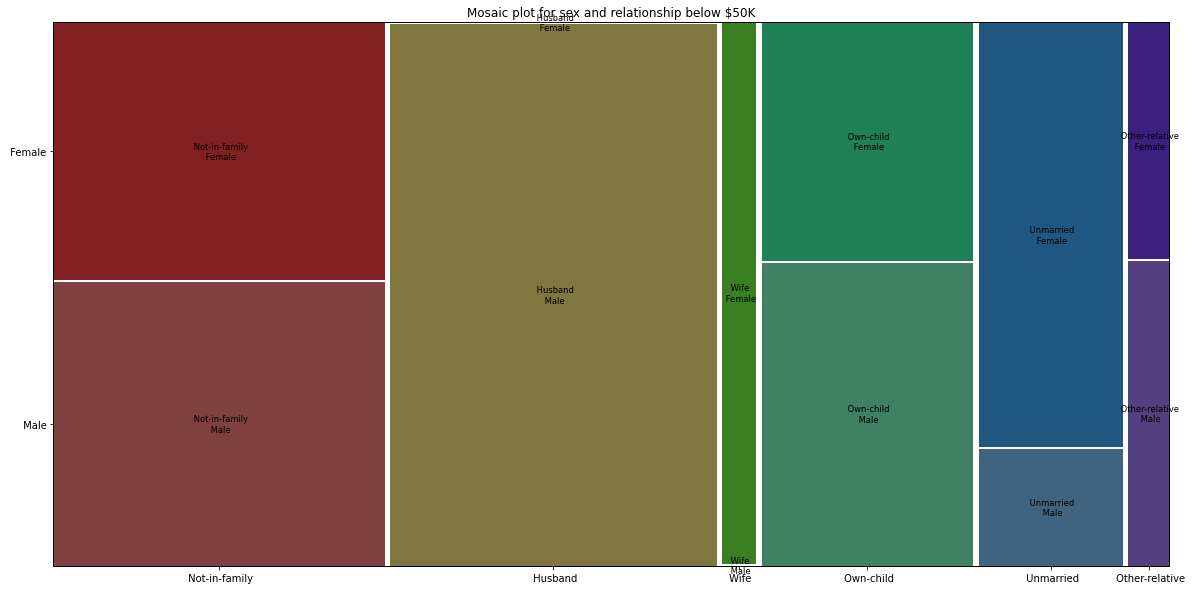

In [8]:
#Scenario 3: Distruibution of Relationship and Sex
fig, ax = plt.subplots(figsize=(20, 10))
mosaic(below_50K, ['relationship', 'sex'], ax=ax, title='Mosaic plot for sex and relationship below $50K')
plt.show()

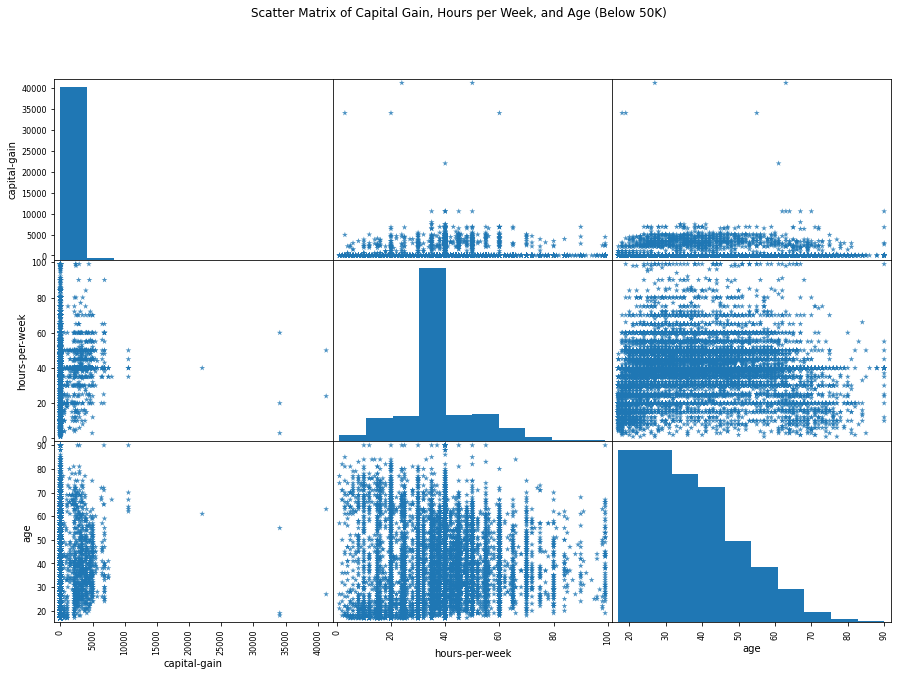

In [9]:
#Scenario 4: Distribution of capital gain, hours worked and age
scatter_matrix_df = below_50K[['capital-gain', 'hours-per-week', 'age']]
scatter_matrix(scatter_matrix_df, figsize=(15, 10), alpha=0.8, marker='*', diagonal='hist')
plt.suptitle("Scatter Matrix of Capital Gain, Hours per Week, and Age (Below 50K)")
plt.show()

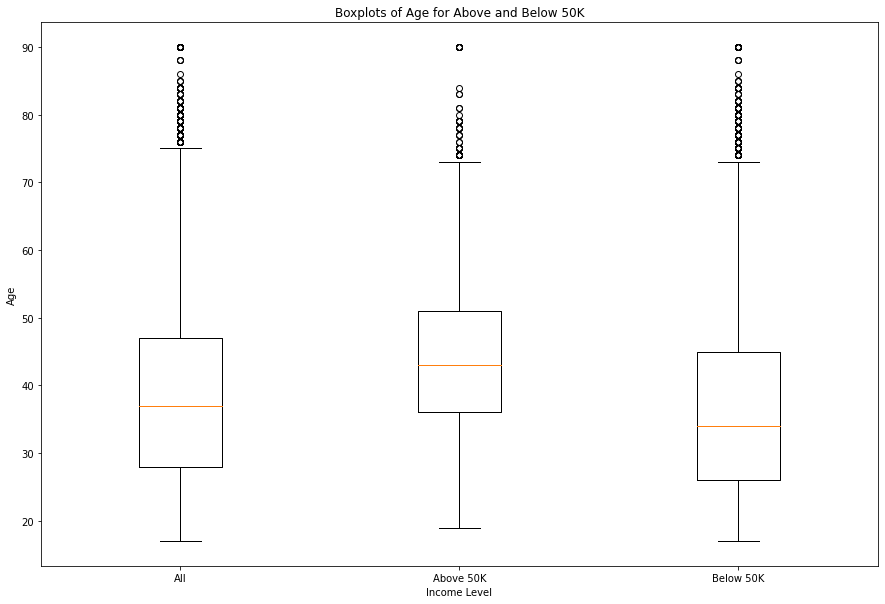

In [10]:
#Scenario 5: Distribution of age
plt.figure(figsize=(15, 10))
plt.boxplot([data["age"], above_50K["age"], below_50K["age"]])
plt.xticks([1, 2, 3], ["All", "Above 50K", "Below 50K"])
plt.xlabel("Income Level")
plt.ylabel("Age")
plt.title("Boxplots of Age for Above and Below 50K")
plt.show()